# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city.replace(' ', '+')}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | nadi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | rondonopolis
Processing Record 8 of Set 1 | catbalogan
Processing Record 9 of Set 1 | hemsby
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | santa cruz de la palma
Processing Record 13 of Set 1 | kabalo
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | hargeysa
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of S

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.90,89,92,8.79,TF,1705959384
1,bredasdorp,-34.5322,20.0403,18.40,66,98,7.82,ZA,1705959385
2,waitangi,-43.9535,-176.5597,18.23,98,100,6.26,NZ,1705959385
3,nadi,-17.8000,177.4167,26.00,89,75,2.06,FJ,1705959385
4,grytviken,-54.2811,-36.5092,1.93,78,51,5.48,GS,1705959346


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\maria\\OneDrive\\Desktop\\Data Analyst Course\\Week 7 - Project 1\\API Homework\\python_api_challenge\\Starter_Code\\output_data\\cities.csv'

In [14]:
# Read saved data
#city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.head()

# Define the path to the CSV file
csv_file_path = r"C:\Users\maria\OneDrive\Desktop\Data Analyst Course\Week 7 - Project 1\API Homework\python_api_challenge\Starter_Code\output_data\cities.csv"

# Read the data from the CSV file
city_data_df = pd.read_csv(csv_file_path, index_col="City_ID")

# Display the first few rows of the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

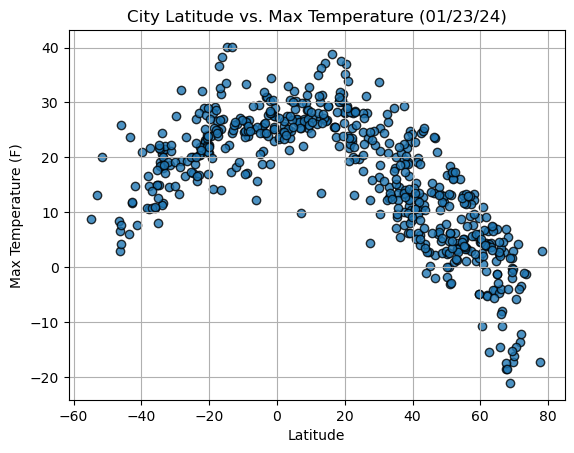

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

#### Latitude Vs. Humidity

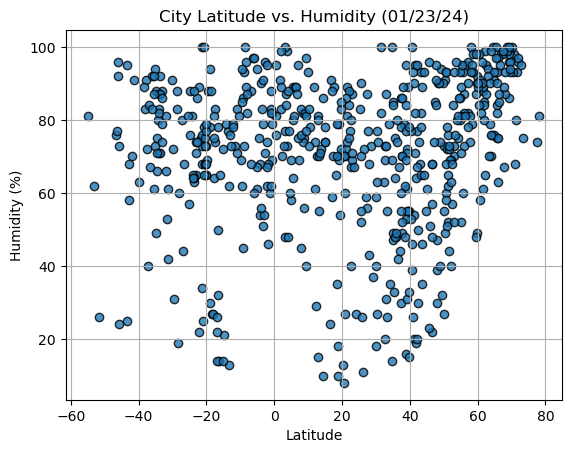

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

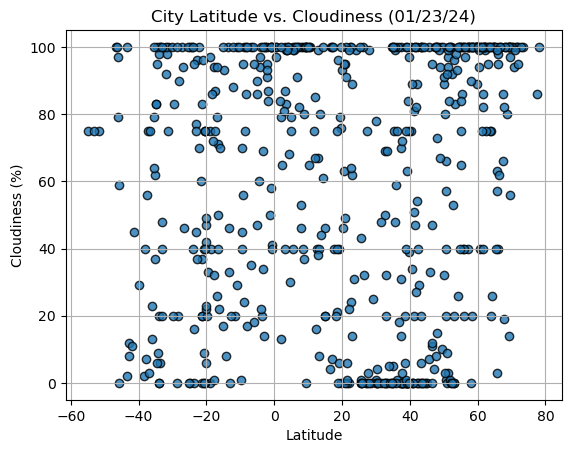

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

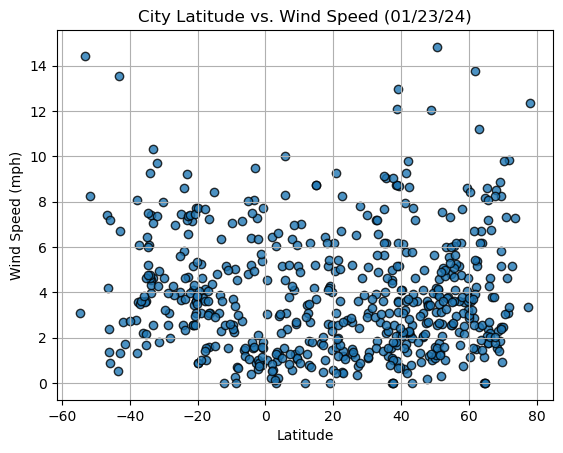

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    """
    Create a scatter plot and linear regression line.

    Parameters:
    x_values (Series): The x values for the scatter plot.
    y_values (Series): The y values for the scatter plot.
    title (str): The title of the chart.
    y_label (str): The label for the y-axis.
    text_coordinates (tuple): The coordinates for the position of the linear regression equation text.
    """
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set the title and labels.
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Print r square value
    print(f"The r-squared is: {r_value**2}")

    # Show plot
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434125


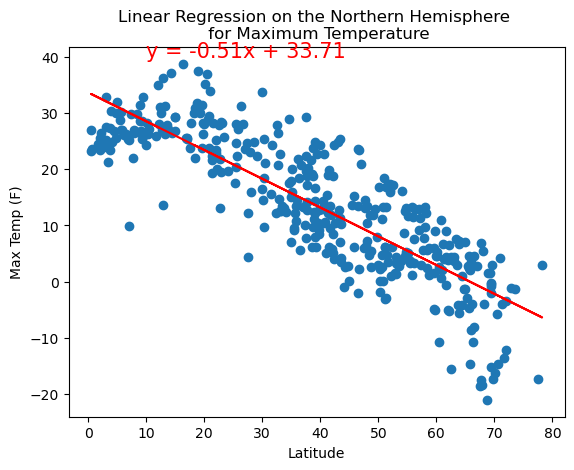

In [23]:
# Linear regression on Northern Hemisphere
# Set the x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define the title and y label
title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
y_label = 'Max Temp (F)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (10, 40)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-squared is: 0.4121057168607252


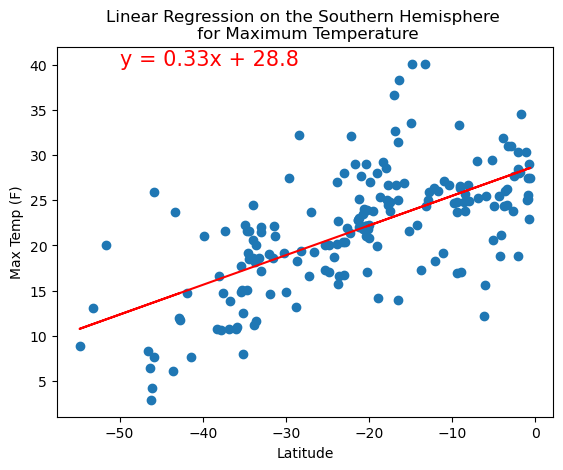

In [24]:
# Linear regression on Southern Hemisphere
# Set the x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define the title and y label
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
y_label = 'Max Temp (F)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (-50, 40)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


**Discussion about the linear relationship: As latitude increase in the northern hemisphere, max temp decreases. As latitude increases in the southern hemisphere, max temp increases. There is a strong correlation for them both. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789608


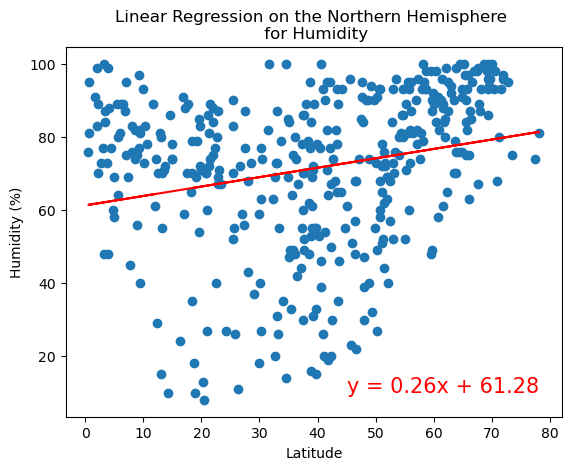

In [25]:
# Northern Hemisphere
# Set the x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define the title and y label
title = 'Linear Regression on the Northern Hemisphere \n for Humidity'
y_label = 'Humidity (%)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (45, 10)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-squared is: 0.0002808747046324618


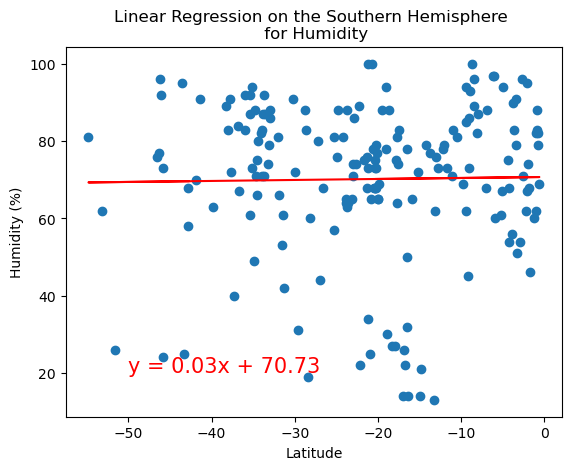

In [26]:
# Southern Hemisphere
# Set the x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define the title and y label
title = 'Linear Regression on the Southern Hemisphere \n for Humidity'
y_label = 'Humidity (%)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (-50, 20)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


**Discussion about the linear relationship: There is no correlation between humidity and latotude in the southern hemisphere and a very weak one in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811043


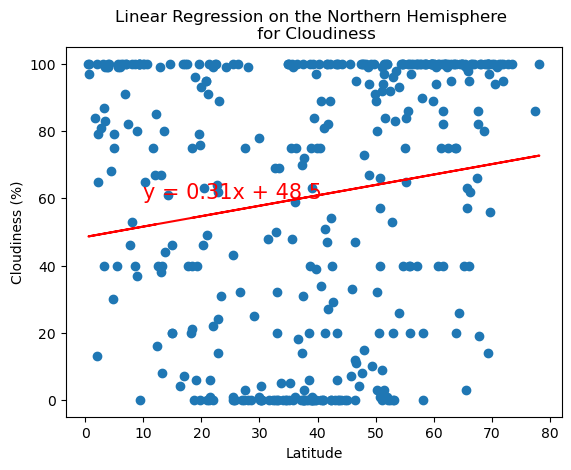

In [28]:
# Northern Hemisphere
# Set the x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define the title and y label
title = 'Linear Regression on the Northern Hemisphere \n for Cloudiness'
y_label = 'Cloudiness (%)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (10, 60)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-squared is: 0.020567354299943663


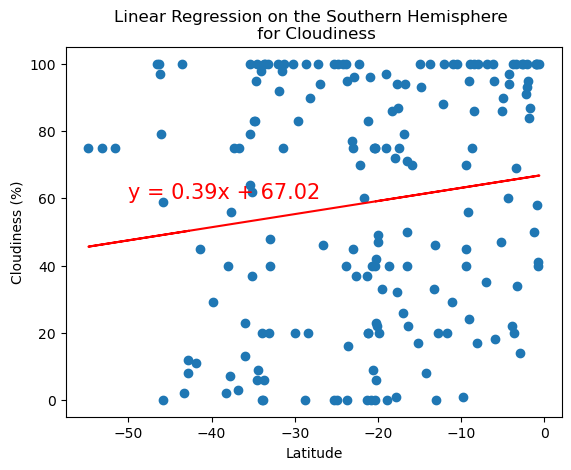

In [29]:
# Southern Hemisphere
# Set the x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define the title and y label
title = 'Linear Regression on the Southern Hemisphere \n for Cloudiness'
y_label = 'Cloudiness (%)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (-50, 60)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


**Discussion about the linear relationship:** There is a weak correlation for both. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449484


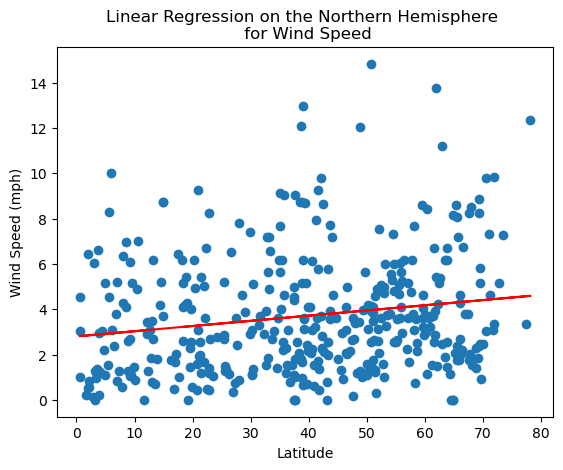

In [31]:
# Northern Hemisphere
# Set the x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define the title and y label
title = 'Linear Regression on the Northern Hemisphere \n for Wind Speed'
y_label = 'Wind Speed (mph)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (10, 25)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


The r-squared is: 0.06223904070051575


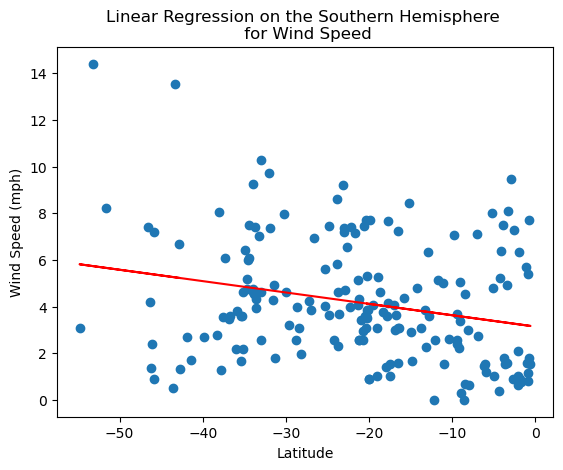

In [32]:
# Set the x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define the title and y label
title = 'Linear Regression on the Southern Hemisphere \n for Wind Speed'
y_label = 'Wind Speed (mph)'

# Define the coordinates for displaying the linear regression equation on the plot
text_coordinates = (-50, 20)  # Adjust these values based on your data range and preference

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


**Discussion about the linear relationship:** There is a weak positive correlation for the northern hemisphere and a weak negative correlation for the southern hemisphere. 